# هدف : تشخیص صورت و چشم

# بارگذاری کتابخانه های لازم

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

# بارگذاری عکس

In [2]:
# بارگذاری عکس
img = cv2.imread('Data/Reza_3.jpg')

# تعریف تابع برای نمایش عکس به ابعاد دلخواه

In [3]:
# Define the display function
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

# نمایش عکس

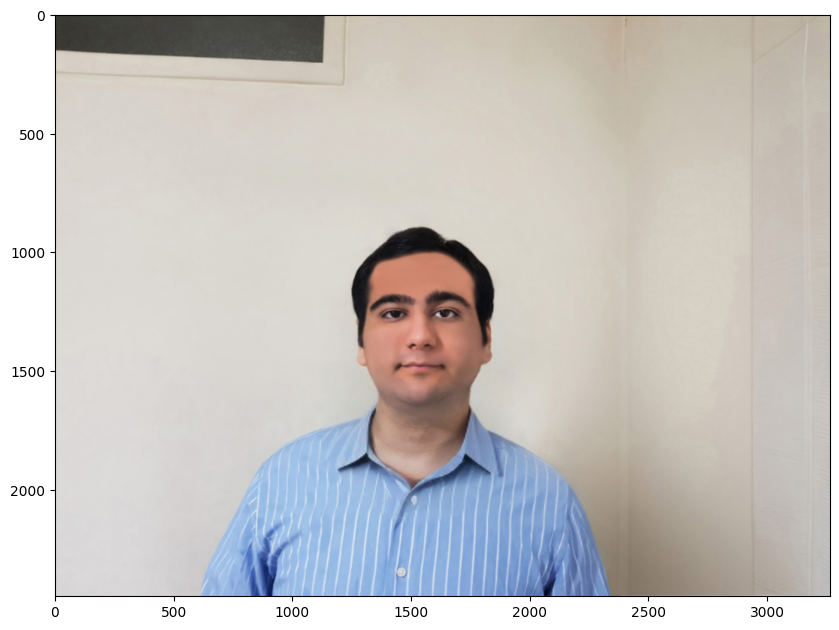

In [4]:
display(img)

# برش عکس

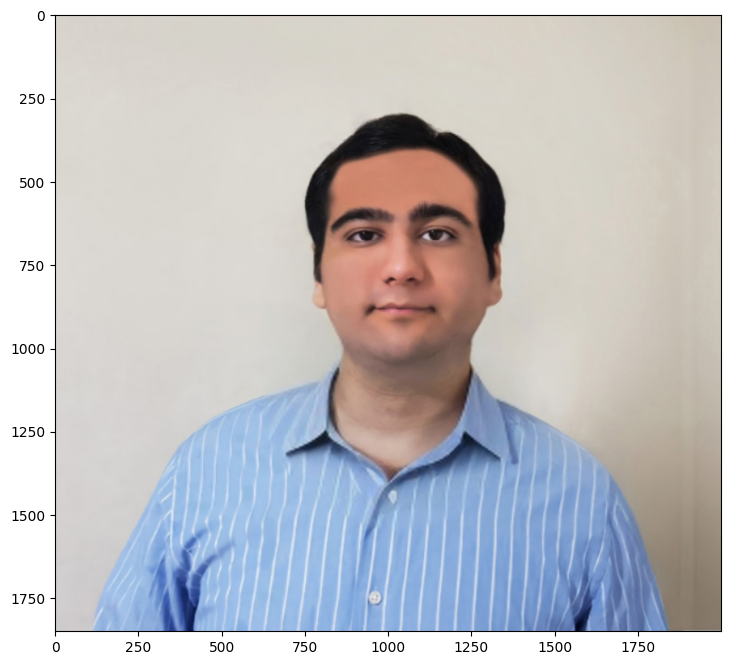

In [5]:
reza = img[600:, 500:2500]
display(reza)

# برای تشخیص چهره Cascade Classifier بارگذاری  فایل دیتا 


In [6]:
# برای تشخیص چهره Cascade Classifier بارگذاری  فایل دیتا 
# https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalcatface.xml

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [7]:
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    return img

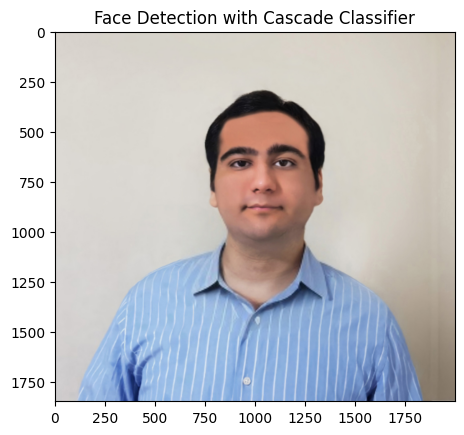

In [8]:
# نمایش تصویر
plt.imshow(cv2.cvtColor(reza, cv2.COLOR_BGR2RGB))
plt.title("Face Detection with Cascade Classifier")
plt.show()

# مثال دوم

In [9]:
solvay = cv2.imread('Data/Solvay.jpg',0)

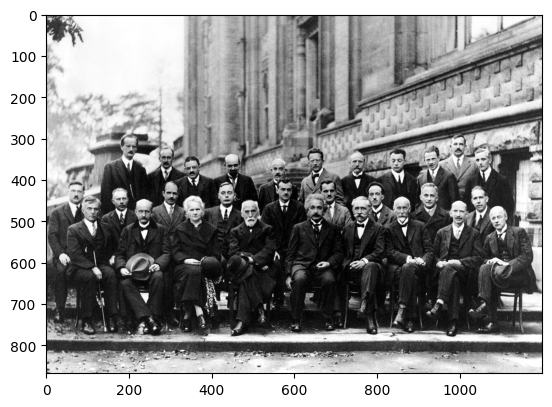

In [10]:
plt.imshow(solvay,cmap='gray')

In [11]:
face_cascale = cv2.CascadeClassifier('Data/haarcascade/haarcascade_frontalface_default.xml')

# چون تعداد افراد زیاد هست در یک بازه مشخص می کنیم

In [12]:
def adj_detect_face(img):
    face_img = img.copy()
    results = []  # برای ذخیره تصاویر مختلف با مقادیر مختلف scaleFactor

    for scale in np.arange(1.1, 3.1, 0.1):  # حلقه برای بررسی scaleFactor از 1.1 تا 3.0 با قدم 0.1
        face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=scale, minNeighbors=4)
        
        img_copy = face_img.copy()  # ایجاد کپی برای هر مقدار scaleFactor
        for (x, y, w, h) in face_rects:
            cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 10)
        
        results.append((img_copy, scale))  # اضافه کردن تصویر و scaleFactor به لیست نتایج

    return results  # برگرداندن نتایج

# ذخیره خروجی تابع

In [13]:
result = adj_detect_face(solvay)

# نمایش عنصر اول لیست

In [14]:
result[0]

(array([[230, 221, 198, ..., 181, 176, 173],
        [232, 214, 205, ..., 182, 174, 169],
        [220, 208, 214, ..., 185, 176, 172],
        ...,
        [220, 175, 139, ..., 235, 238, 241],
        [166, 132, 110, ..., 227, 232, 238],
        [ 97,  78,  76, ..., 223, 230, 238]], dtype=uint8),
 1.1)

In [15]:
# نمایش برای همه مقادیر 

# for img, scale in result:
#     print(img,scale)

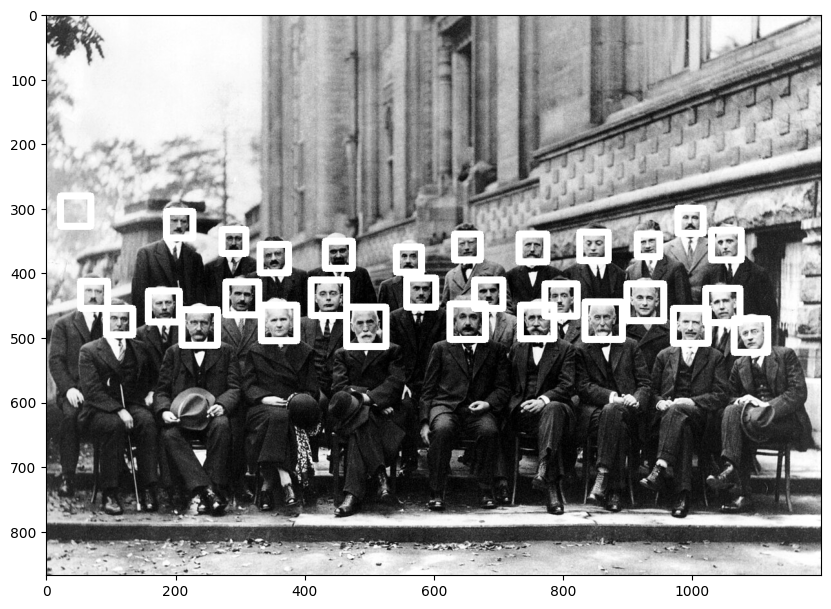

In [16]:
display(result[0][0])

# بدست آوردن رنگ پیکسل یک بخش خاص در تصویر

In [17]:
import cv2

# چون سیاه و سفید باز شده عکس 
# بدست آوردن رنگ پیکسل
color = solvay[300,30]
print(f"Color (Gray level) at pixel ({30}, {300}): {color}")

# ====================
# اگر رنگی بود
# (b, g, r) = solvay[300,30]  # بدست آوردن رنگ پیکسل
# print(f"Color at pixel ({x}, {y}): R={r}, G={g}, B={b}")

Color (Gray level) at pixel (30, 300): 216


# تار کردن آن قسمت

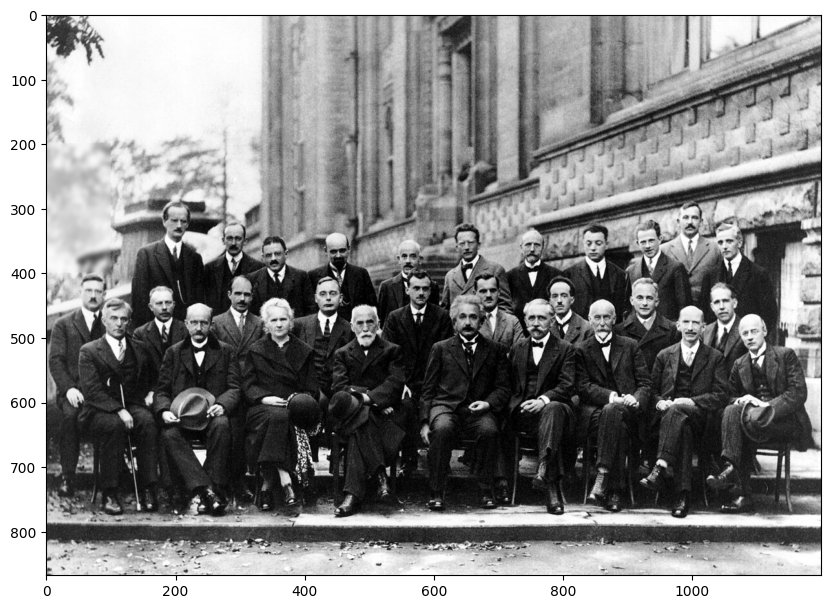

In [18]:
# استخراج ناحیه مورد نظر
roi = solvay[200:400, 0:100]

# برای بلور کردن ناحیه GaussianBlur اعمال فیلتر 
blurred_roi = cv2.GaussianBlur(roi, (19, 19),0)  # مقدار (15, 15) اندازه‌ی فیلتر است عدد باید فرد باشد

# جایگزینی ناحیه بلور شده با ناحیه اصلی در تصویر
solvay[200:400, 0:100] = blurred_roi

display(solvay)

In [19]:
def adj_detect_face(img):
    face_img = img.copy()
    results = []  # برای ذخیره تصاویر مختلف با مقادیر مختلف scaleFactor

    for scale in np.arange(1.1, 3.1, 0.1):  # حلقه برای بررسی scaleFactor از 1.1 تا 3.0 با قدم 0.1
        face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=scale, minNeighbors=4)
        
        img_copy = face_img.copy()  # ایجاد کپی برای هر مقدار scaleFactor
        for (x, y, w, h) in face_rects:
            cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 10)
        
        results.append((img_copy, scale))  # اضافه کردن تصویر و scaleFactor به لیست نتایج

    return results  # برگرداندن نتایج

In [20]:
result = adj_detect_face(solvay)

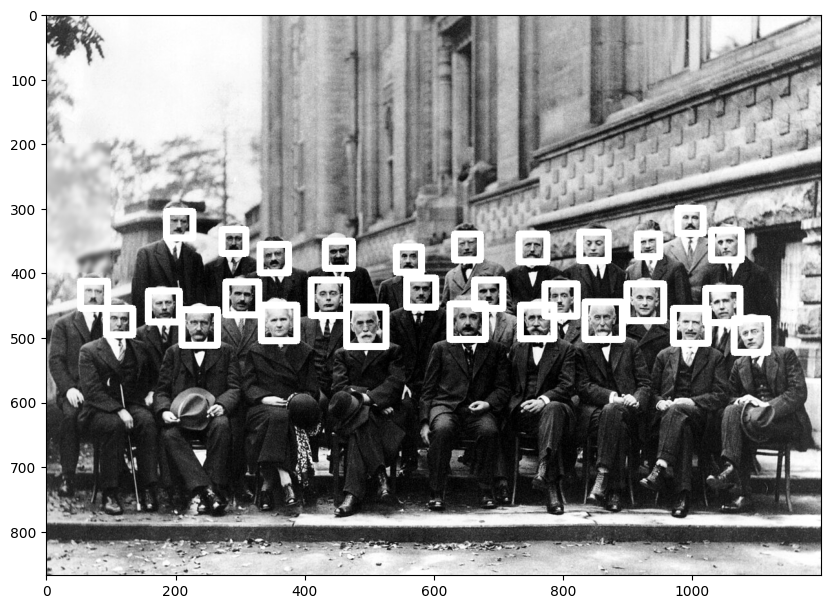

In [21]:
display(result[0][0])

-----------------------------

# تشخیص چشم

# بازگذاری فایل مربوط به تشخیص چشم

In [22]:
eye_cascade = cv2.CascadeClassifier('Data/haarcascade/haarcascade_eye.xml')

# تابع تشخیص چشم

In [23]:
def detect_eyes(img):
    face_img = img.copy()
    eye_rects = eye_cascade.detectMultiScale(face_img, scaleFactor=2.5, minNeighbors=20)
    
    for (x, y, w, h) in eye_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 10)
        
    return face_img


# ذخیره نتیجه

In [24]:
result = detect_eyes(reza)

# نمایش نتیجه

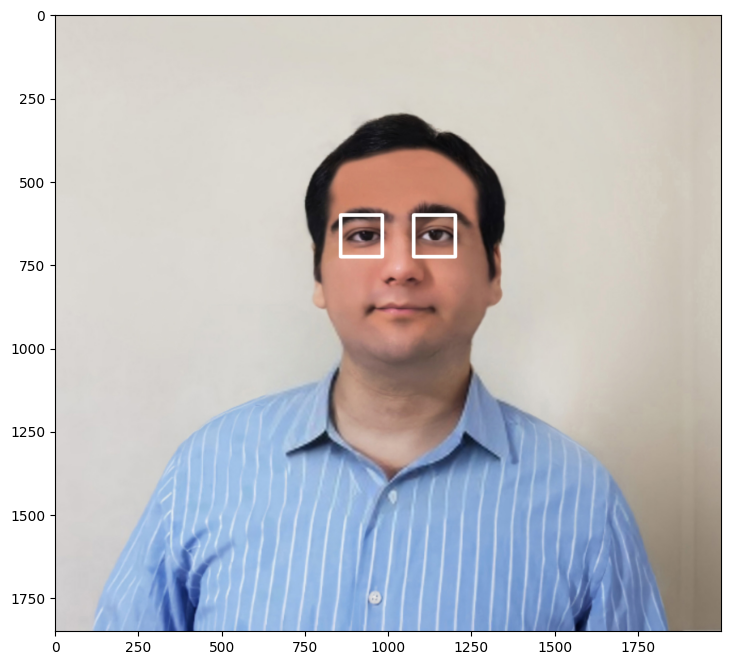

In [25]:
display(result)

# استفاده از وبکم برای تشخیص این موارد

In [28]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame,1)
    
    # تشخیص چهره
    frame = detect_face(frame)
    # تشخیص چشم
    frame = detect_eyes(frame)
    
    # نمایش فریم
    cv2.imshow('Video Face Detect', frame)
    
    k = cv2.waitKey(1)
    if k == ord('q') or k == 27:  # کلید 'q' و کلید ESC برای خروج
        break

cap.release()
cv2.destroyAllWindows()